# Gradient Boosting Regressor - Use of econometrics and machine learning models to predict the number of new cases per day of COVID-19

Upload manually the datasets

##1. Import

In [ ]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from time import time
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import *
import seaborn as sns
import statsmodels.api as sm
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install ipython-autotime

%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=605a71928b4fda4044be8836f9153e9bd0e42ae179caf42b1c019bf3411be920
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


##Read CSVs

###Brazil

In [ ]:
brazil = pd.read_csv('brazil.csv', sep=',', index_col='date', parse_dates=True)

time: 21.5 ms


In [ ]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2020-02-26 to 2020-03-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   newcases      27 non-null     int64  
 1   newcases100k  27 non-null     float64
 2   totalcases    27 non-null     float64
 3   prevalence    27 non-null     float64
 4   incidence     27 non-null     float64
 5   incidence7d   27 non-null     float64
 6   deathrate     27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.7 KB
time: 7.27 ms


In [ ]:
brazil.describe()

,newcases,newcases100k,totalcases,prevalence,incidence,incidence7d,deathrate
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,72.000000,0.034368,0.139362,0.137311,0.034368,0.018070,0.003147
std,117.130762,0.055910,0.246537,0.242138,0.055910,0.030853,0.005909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000477,0.000955,0.000955,0.000477,0.000136,0.000000
50%,18.000000,0.008592,0.016229,0.016229,0.008592,0.003887,0.000000
75%,68.000000,0.032458,0.125298,0.124344,0.032458,0.016741,0.001718
max,392.000000,0.187112,0.915990,0.898807,0.187112,0.114899,0.017718


time: 47.8 ms


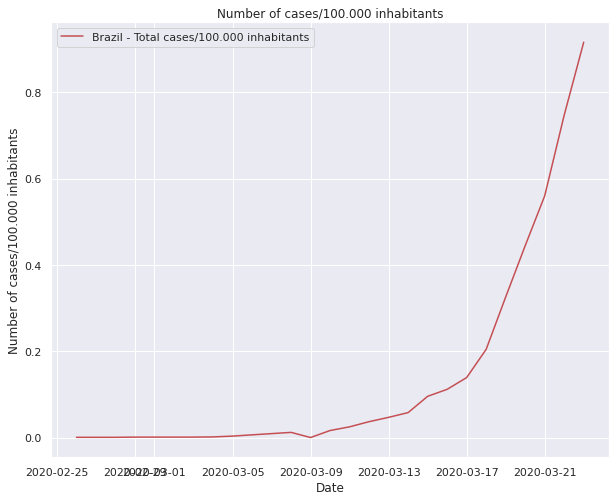

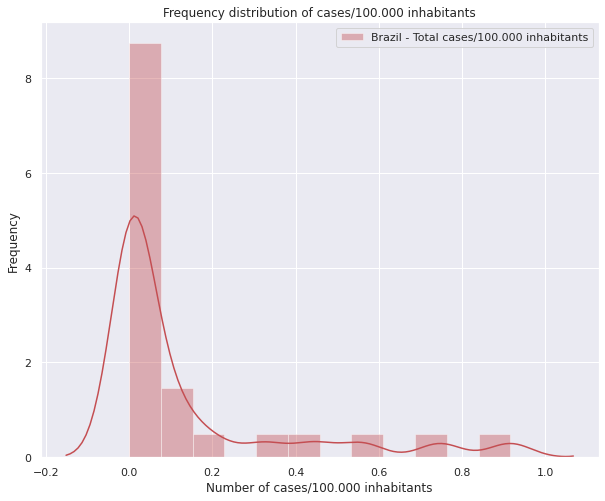

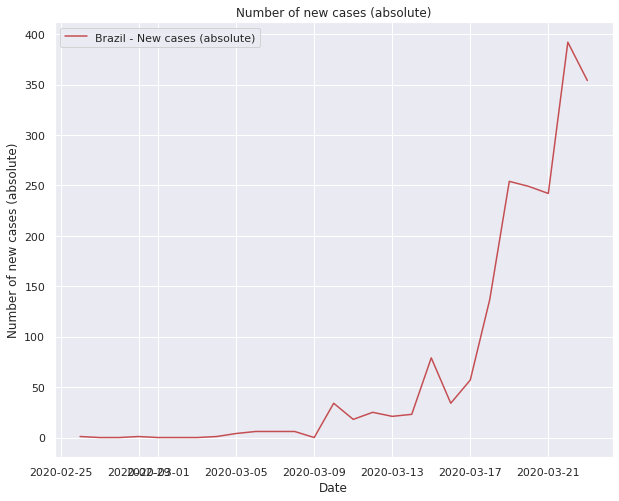

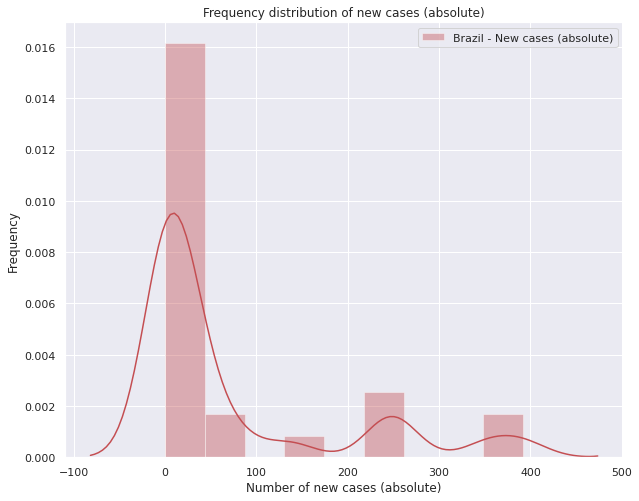

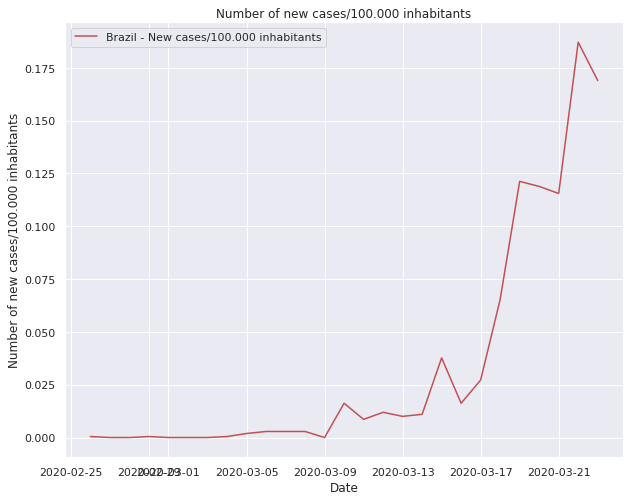

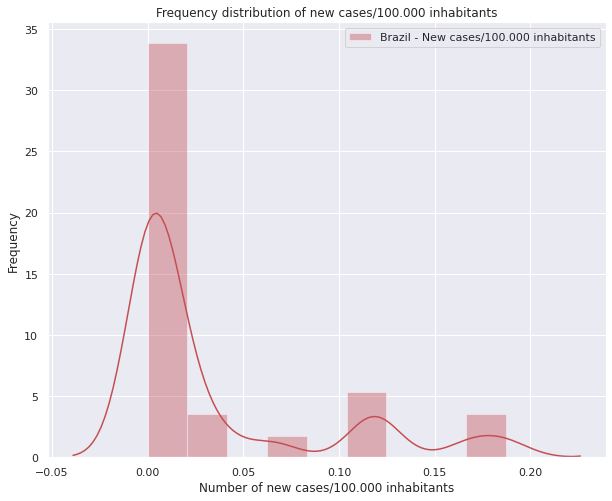

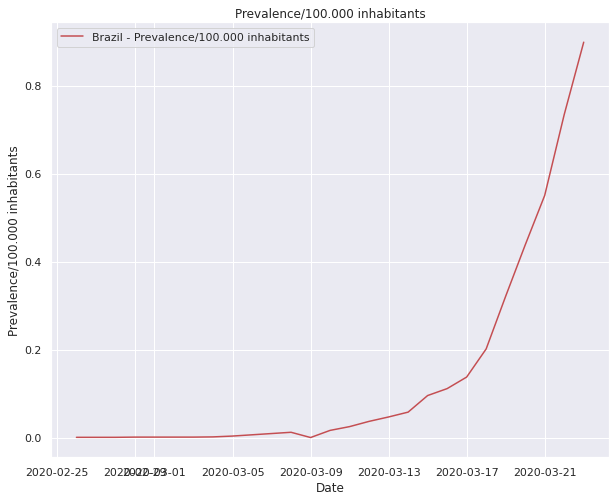

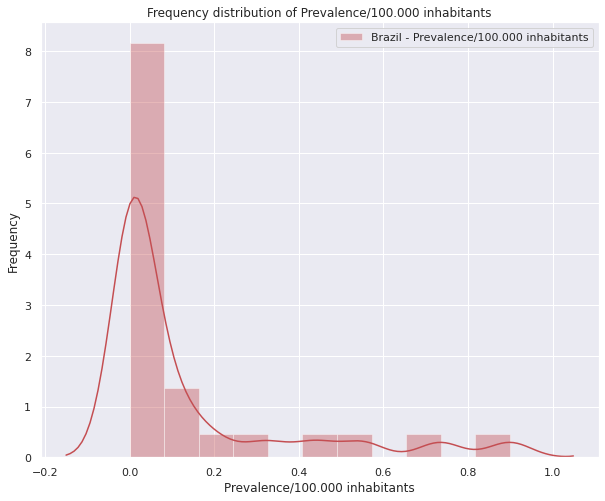

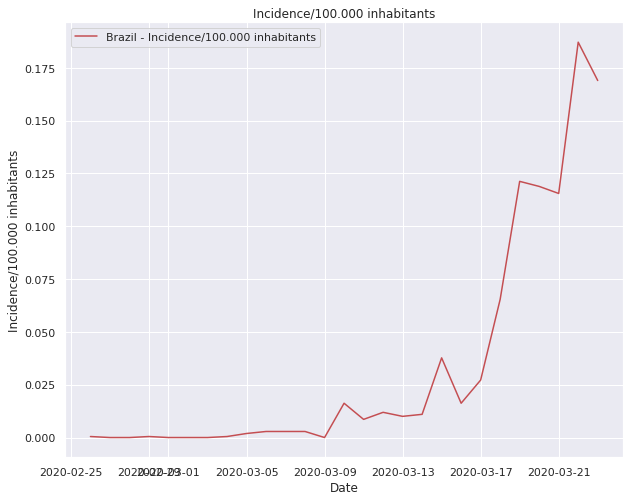

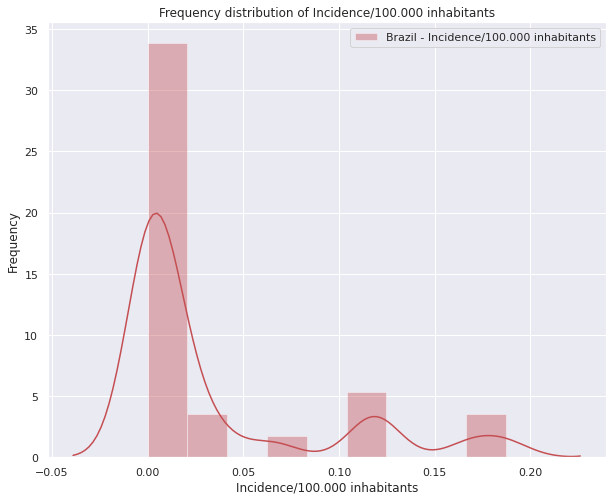

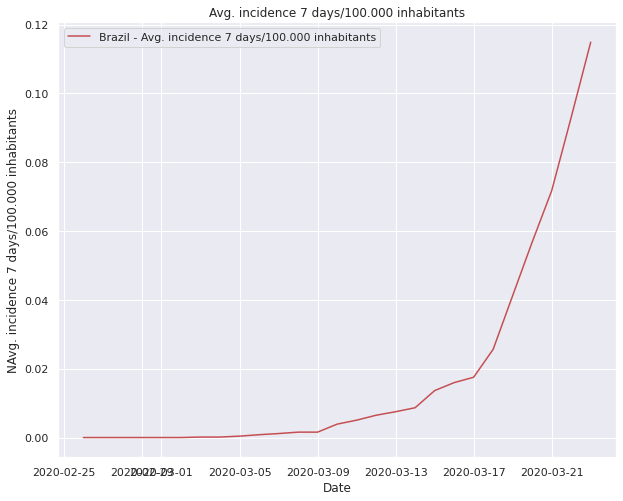

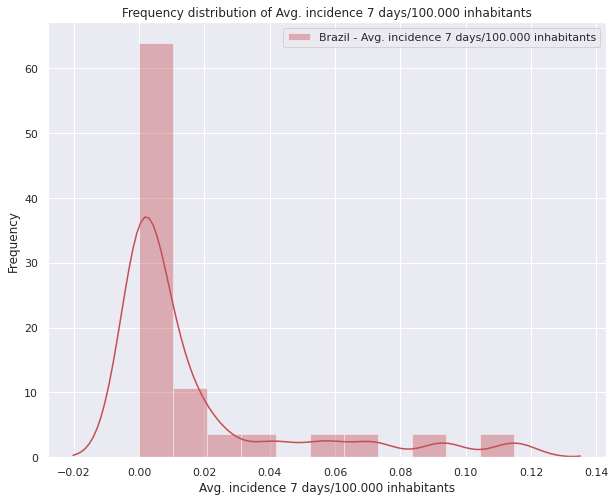

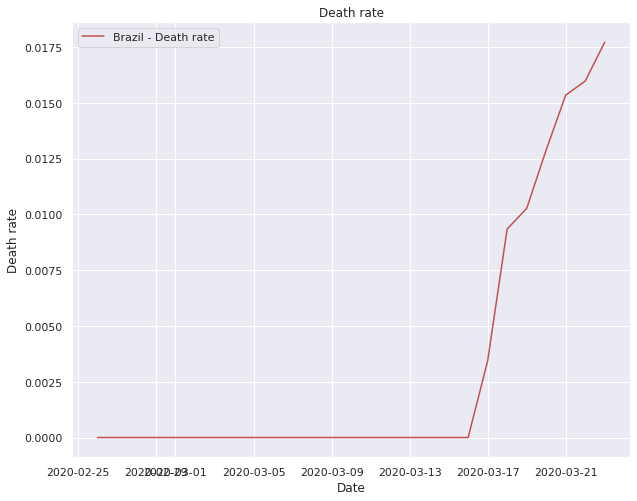

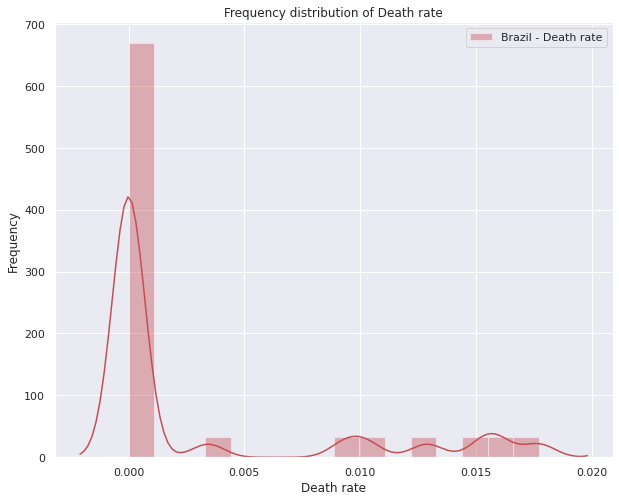

time: 4.54 s


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(brazil["totalcases"] , color="r", label="Brazil - Total cases/100.000 inhabitants")
plt.ylabel("Number of cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["totalcases"] , color="r", label="Brazil - Total cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of cases/100.000 inhabitants")
plt.title('Frequency distribution of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["newcases"] , color="r", label="Brazil - New cases (absolute)")
plt.ylabel("Number of new cases (absolute)")
plt.xlabel("Date")
plt.title('Number of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["newcases"] , color="r", label="Brazil - New cases (absolute)")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases (absolute)")
plt.title('Frequency distribution of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["newcases100k"] , color="r", label="Brazil - New cases/100.000 inhabitants")
plt.ylabel("Number of new cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["newcases100k"] , color="r", label="Brazil - New cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases/100.000 inhabitants")
plt.title('Frequency distribution of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["prevalence"] , color="r", label="Brazil - Prevalence/100.000 inhabitants")
plt.ylabel("Prevalence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["prevalence"] , color="r", label="Brazil - Prevalence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Prevalence/100.000 inhabitants")
plt.title('Frequency distribution of Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["incidence"] , color="r", label="Brazil - Incidence/100.000 inhabitants")
plt.ylabel("Incidence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["incidence"] , color="r", label="Brazil - Incidence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Incidence/100.000 inhabitants")
plt.title('Frequency distribution of Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["incidence7d"] , color="r", label="Brazil - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("NAvg. incidence 7 days/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["incidence7d"] , color="r", label="Brazil - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Avg. incidence 7 days/100.000 inhabitants")
plt.title('Frequency distribution of Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["deathrate"] , color="r", label="Brazil - Death rate")
plt.ylabel("Death rate")
plt.xlabel("Date")
plt.title('Death rate')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(brazil["deathrate"] , color="r", label="Brazil - Death rate")
plt.ylabel("Frequency")
plt.xlabel("Death rate")
plt.title('Frequency distribution of Death rate')
plt.legend()
plt.show()

###China

In [ ]:
china = pd.read_csv('china.csv', sep=',', index_col='date', parse_dates=True)

time: 7.49 ms


In [ ]:
china.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-01-23 to 2020-03-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   newcases      60 non-null     int64  
 1   newcases100k  60 non-null     float64
 2   totalcases    60 non-null     float64
 3   prevalence    60 non-null     float64
 4   incidence     60 non-null     float64
 5   incidence7d   54 non-null     float64
 6   deathrate     60 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.8 KB
time: 12.9 ms


In [ ]:
china.describe()

,newcases,newcases100k,totalcases,prevalence,incidence,incidence7d,deathrate
count,60.000000,60.000000,60.000000,60.000000,60.000000,54.000000,60.000000
mean,1341.883333,0.096351,4.121120,1.933063,0.096351,0.106048,0.030963
std,2304.106467,0.165442,2.141164,1.338522,0.165442,0.112408,0.007154
min,8.000000,0.000574,0.045882,0.042436,0.000574,0.001241,0.020504
25%,46.750000,0.003357,2.383464,0.697745,0.003357,0.010309,0.023884
50%,430.000000,0.030875,5.471171,1.752423,0.030875,0.052883,0.030877
75%,2054.250000,0.147501,5.791897,2.909654,0.147501,0.205477,0.038143
max,15133.000000,1.086594,5.820349,4.167875,1.086594,0.330468,0.040229


time: 37.1 ms


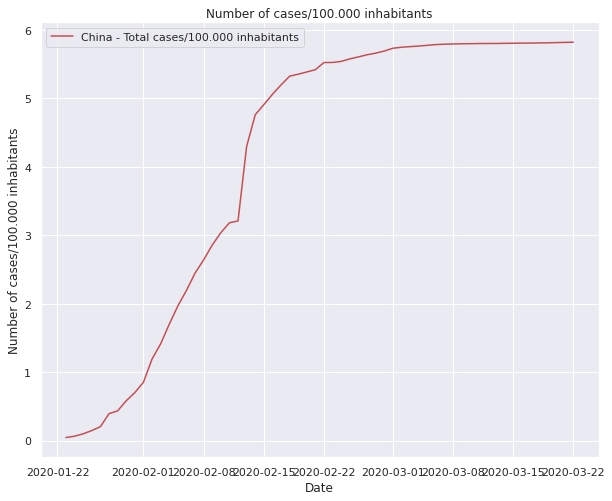

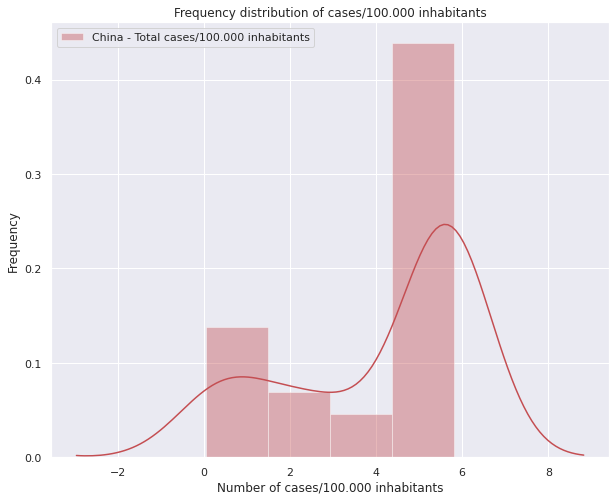

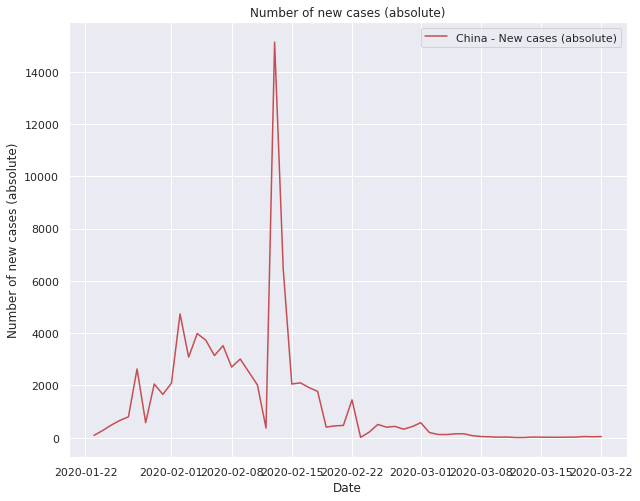

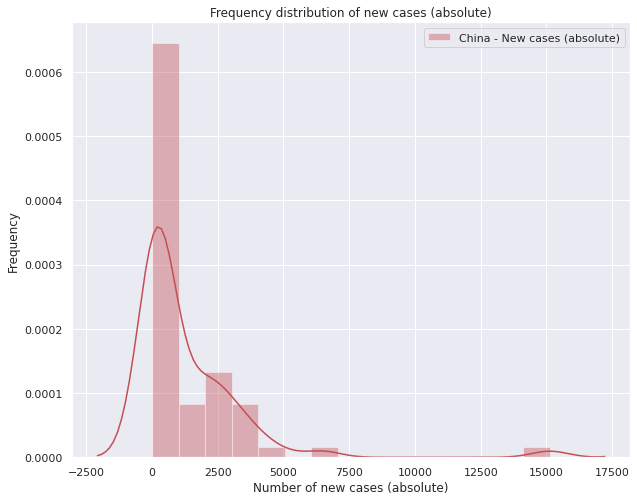

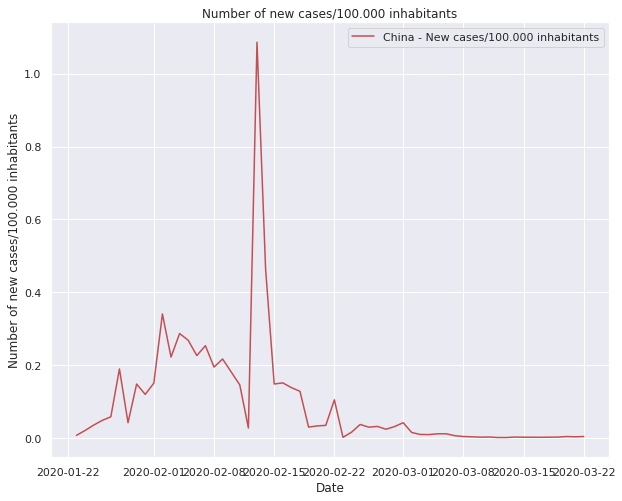

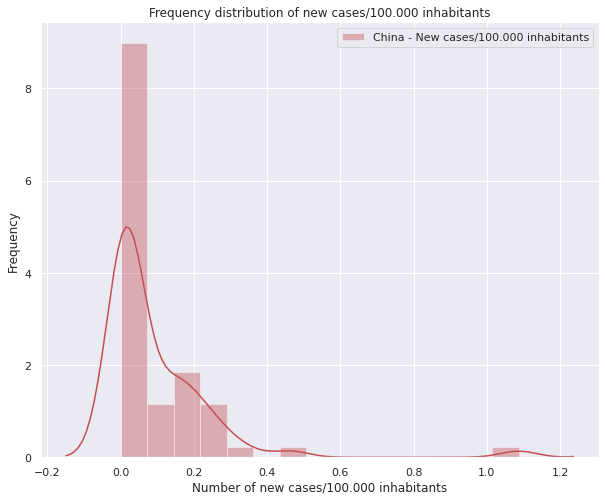

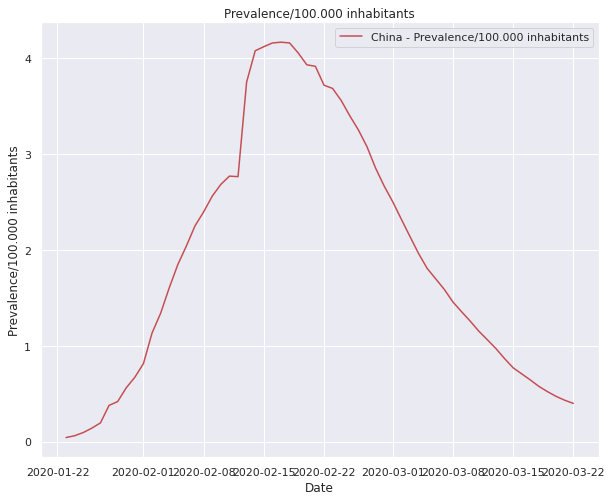

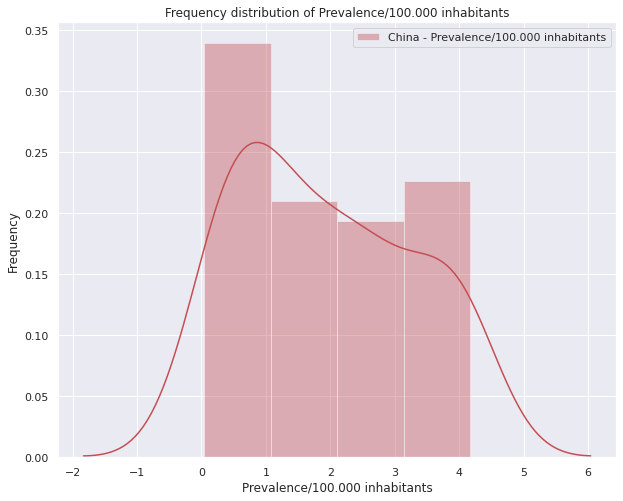

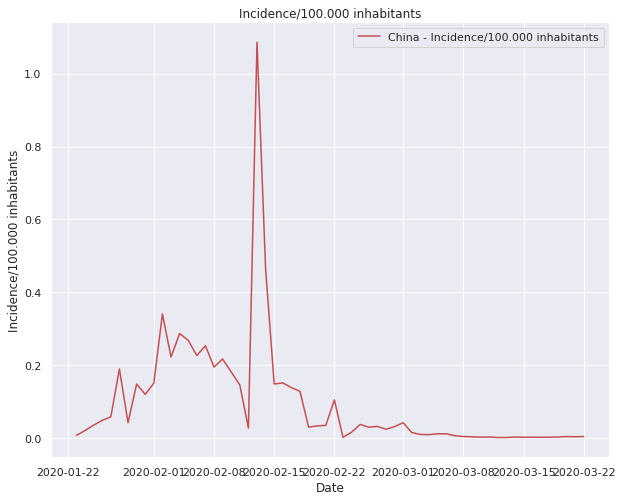

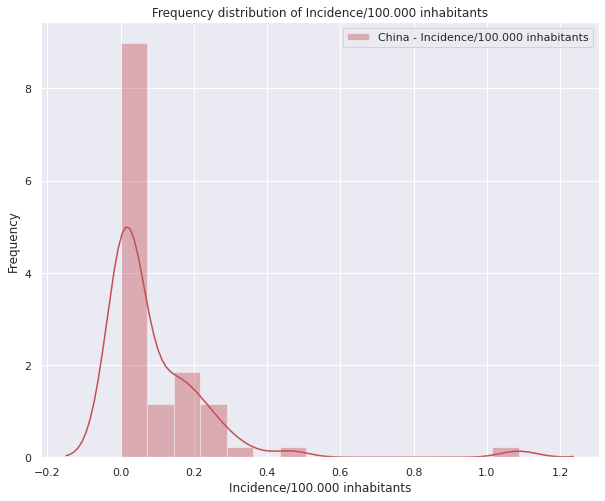

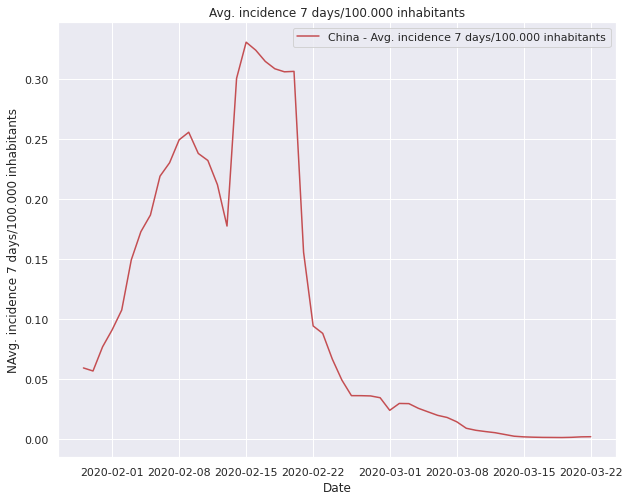

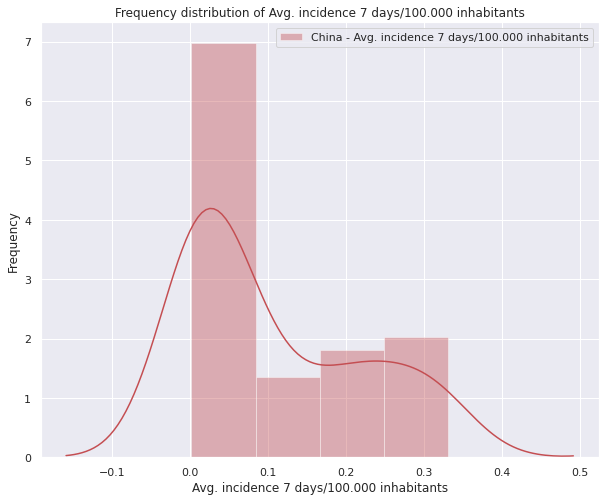

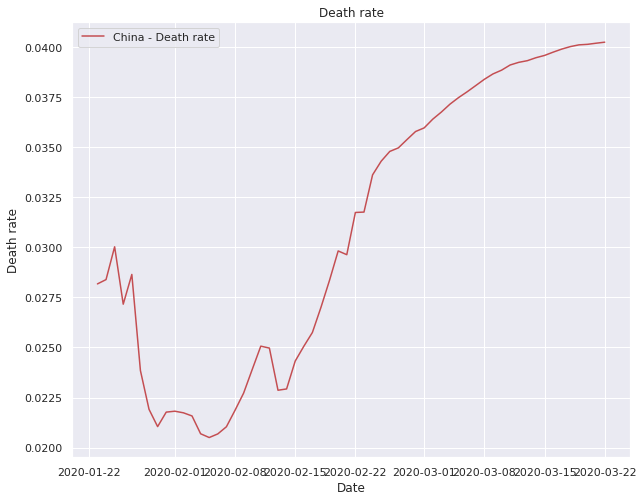

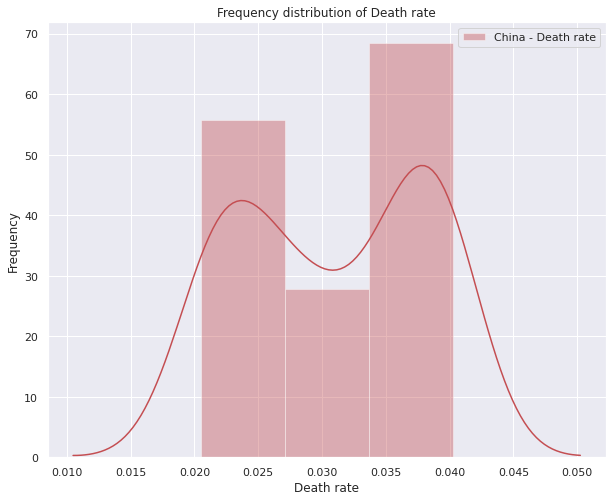

time: 4.7 s


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(china["totalcases"] , color="r", label="China - Total cases/100.000 inhabitants")
plt.ylabel("Number of cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["totalcases"] , color="r", label="China - Total cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of cases/100.000 inhabitants")
plt.title('Frequency distribution of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(china["newcases"] , color="r", label="China - New cases (absolute)")
plt.ylabel("Number of new cases (absolute)")
plt.xlabel("Date")
plt.title('Number of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["newcases"] , color="r", label="China - New cases (absolute)")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases (absolute)")
plt.title('Frequency distribution of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(china["newcases100k"] , color="r", label="China - New cases/100.000 inhabitants")
plt.ylabel("Number of new cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["newcases100k"] , color="r", label="China - New cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases/100.000 inhabitants")
plt.title('Frequency distribution of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(china["prevalence"] , color="r", label="China - Prevalence/100.000 inhabitants")
plt.ylabel("Prevalence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["prevalence"] , color="r", label="China - Prevalence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Prevalence/100.000 inhabitants")
plt.title('Frequency distribution of Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(china["incidence"] , color="r", label="China - Incidence/100.000 inhabitants")
plt.ylabel("Incidence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["incidence"] , color="r", label="China - Incidence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Incidence/100.000 inhabitants")
plt.title('Frequency distribution of Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(china["incidence7d"] , color="r", label="China - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("NAvg. incidence 7 days/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["incidence7d"] , color="r", label="China - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Avg. incidence 7 days/100.000 inhabitants")
plt.title('Frequency distribution of Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(china["deathrate"] , color="r", label="China - Death rate")
plt.ylabel("Death rate")
plt.xlabel("Date")
plt.title('Death rate')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(china["deathrate"] , color="r", label="China - Death rate")
plt.ylabel("Frequency")
plt.xlabel("Death rate")
plt.title('Frequency distribution of Death rate')
plt.legend()
plt.show()

###Italy

In [ ]:
italy = pd.read_csv('italy.csv', sep=',', index_col='date', parse_dates=True)

time: 7.13 ms


In [ ]:
italy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2020-02-24 to 2020-03-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   newcases      27 non-null     float64
 1   newcases100k  28 non-null     float64
 2   totalcases    28 non-null     float64
 3   prevalence    28 non-null     float64
 4   incidence     28 non-null     float64
 5   incidence7d   28 non-null     float64
 6   deathrate     28 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB
time: 8.87 ms


In [ ]:
italy.describe()

,newcases,newcases100k,totalcases,prevalence,incidence,incidence7d,deathrate
count,27.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2181.814815,3.483266,26.083314,21.396996,3.483266,2.469668,0.053554
std,2004.351805,3.327215,29.302937,23.372156,3.327215,2.571477,0.024000
min,78.000000,0.000000,0.379139,0.365894,0.000000,0.000000,0.020071
25%,516.000000,0.720199,3.229305,2.931291,0.720199,0.421604,0.030934
50%,1492.000000,2.267384,13.697848,11.897351,2.267384,1.515728,0.050053
75%,3511.500000,5.801738,42.310017,35.133278,5.801738,4.193709,0.074106
max,6557.000000,10.855960,97.910596,77.215232,10.855960,8.134106,0.092597


time: 47.6 ms


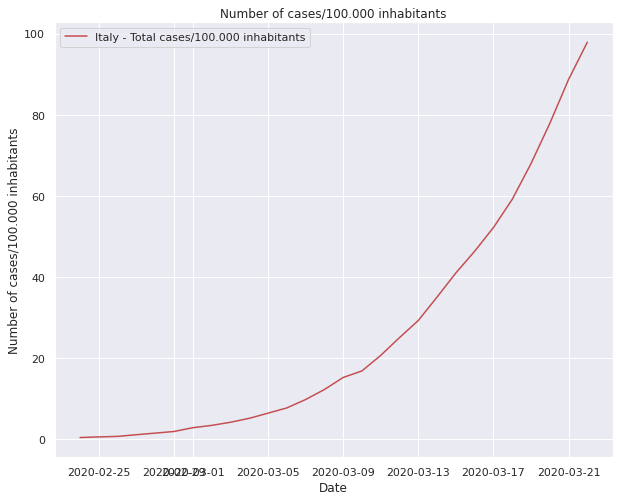

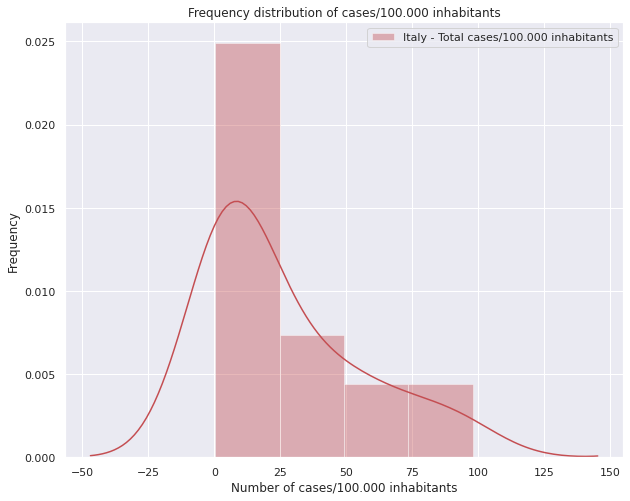

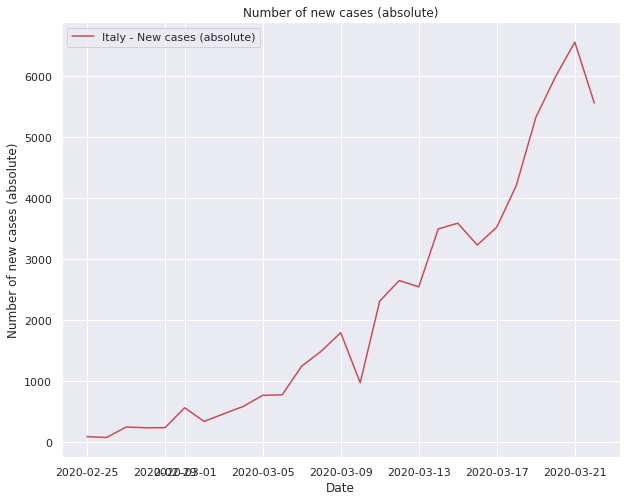

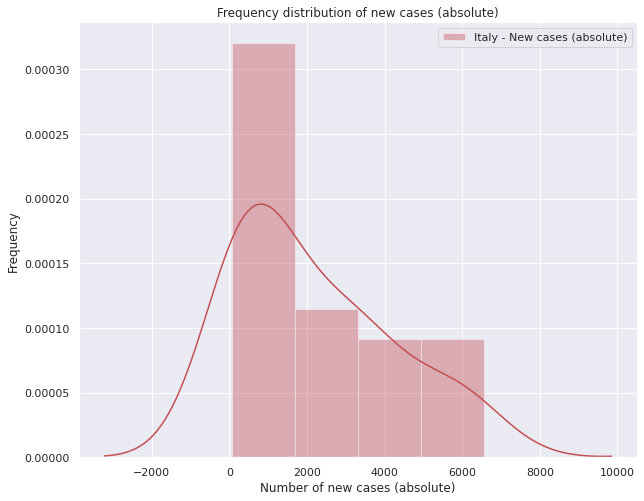

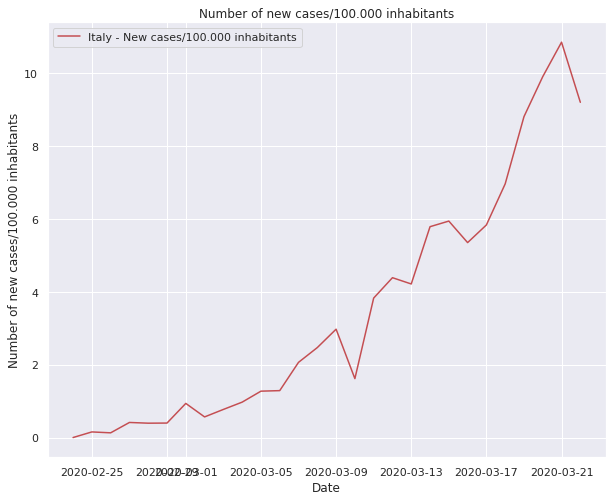

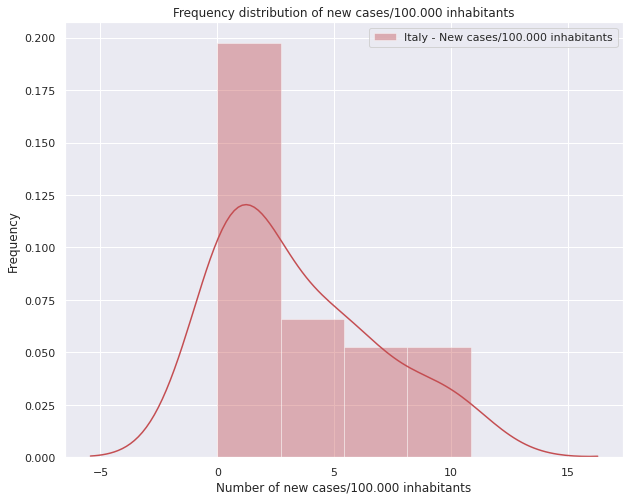

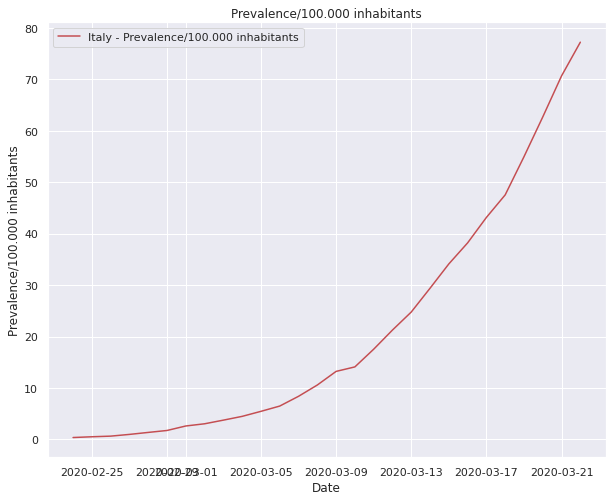

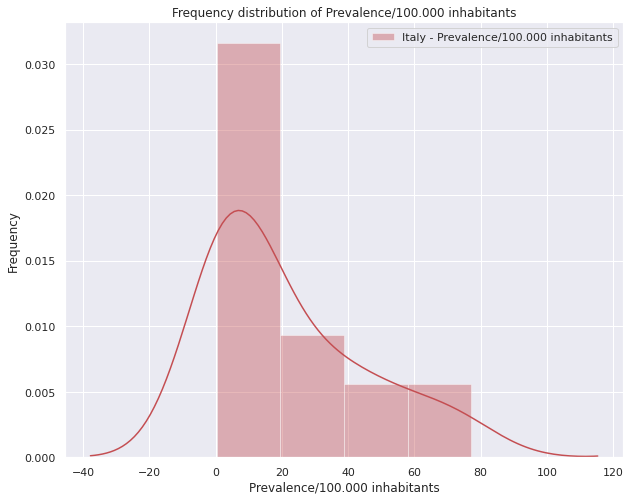

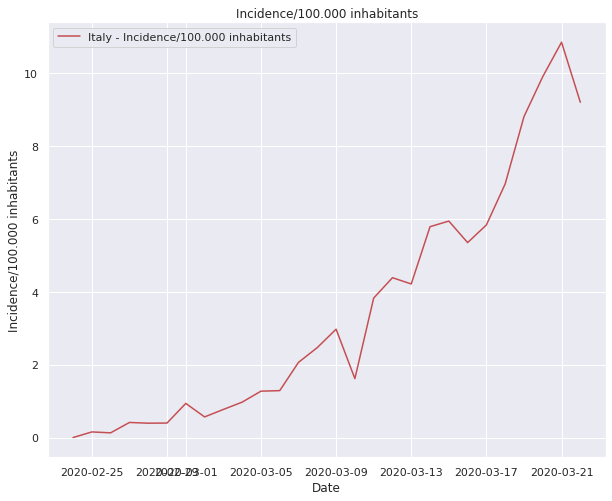

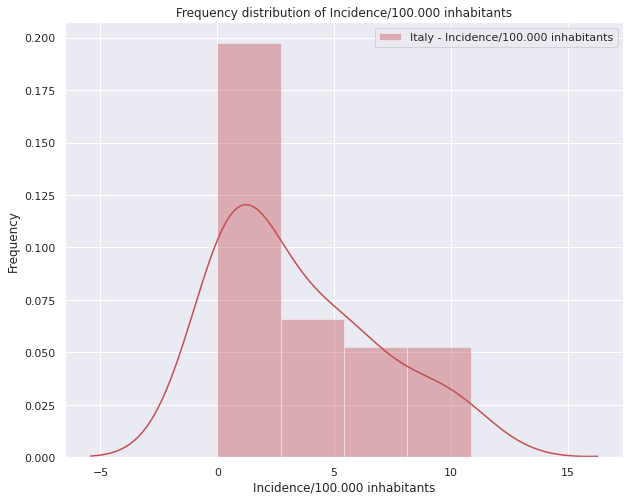

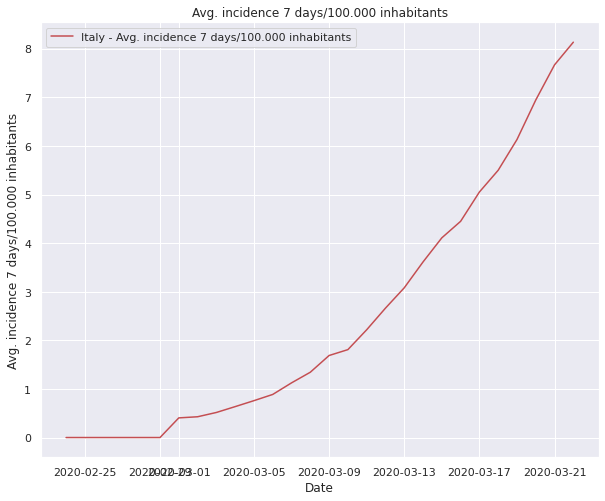

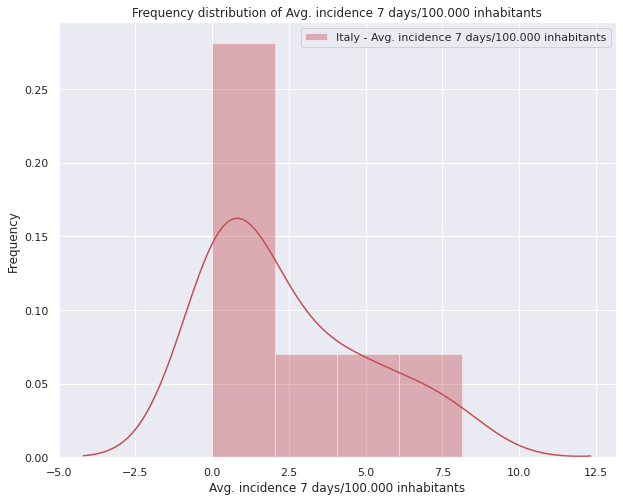

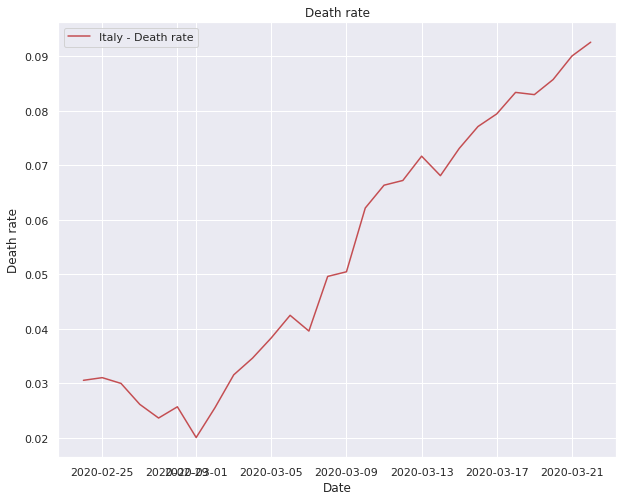

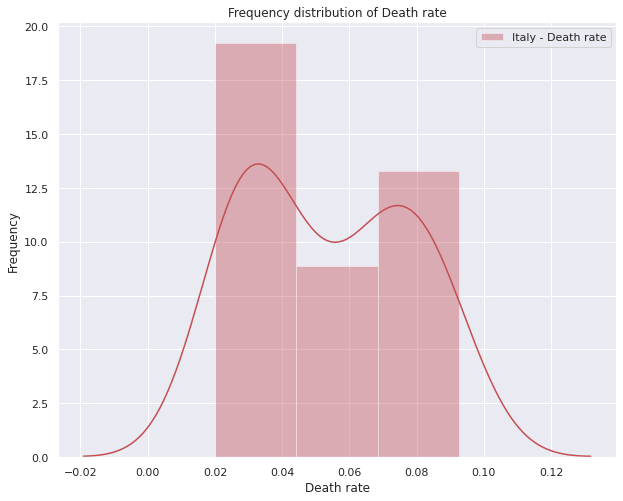

time: 4.44 s


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(italy["totalcases"] , color="r", label="Italy - Total cases/100.000 inhabitants")
plt.ylabel("Number of cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["totalcases"] , color="r", label="Italy - Total cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of cases/100.000 inhabitants")
plt.title('Frequency distribution of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(italy["newcases"] , color="r", label="Italy - New cases (absolute)")
plt.ylabel("Number of new cases (absolute)")
plt.xlabel("Date")
plt.title('Number of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["newcases"] , color="r", label="Italy - New cases (absolute)")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases (absolute)")
plt.title('Frequency distribution of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(italy["newcases100k"] , color="r", label="Italy - New cases/100.000 inhabitants")
plt.ylabel("Number of new cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["newcases100k"] , color="r", label="Italy - New cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases/100.000 inhabitants")
plt.title('Frequency distribution of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(italy["prevalence"] , color="r", label="Italy - Prevalence/100.000 inhabitants")
plt.ylabel("Prevalence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["prevalence"] , color="r", label="Italy - Prevalence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Prevalence/100.000 inhabitants")
plt.title('Frequency distribution of Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(italy["incidence"] , color="r", label="Italy - Incidence/100.000 inhabitants")
plt.ylabel("Incidence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["incidence"] , color="r", label="Italy - Incidence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Incidence/100.000 inhabitants")
plt.title('Frequency distribution of Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(italy["incidence7d"] , color="r", label="Italy - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("Avg. incidence 7 days/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["incidence7d"] , color="r", label="Italy - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Avg. incidence 7 days/100.000 inhabitants")
plt.title('Frequency distribution of Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(italy["deathrate"] , color="r", label="Italy - Death rate")
plt.ylabel("Death rate")
plt.xlabel("Date")
plt.title('Death rate')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(italy["deathrate"] , color="r", label="Italy - Death rate")
plt.ylabel("Frequency")
plt.xlabel("Death rate")
plt.title('Frequency distribution of Death rate')
plt.legend()
plt.show()

###South Korea

In [ ]:
korea = pd.read_csv('korea.csv', sep=',', index_col='date', parse_dates=True)

time: 6.5 ms


In [ ]:
korea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2020-01-21 to 2020-03-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   newcases      62 non-null     int64  
 1   newcases100k  62 non-null     float64
 2   totalcases    62 non-null     float64
 3   prevalence    62 non-null     float64
 4   incidence     62 non-null     float64
 5   incidence7d   62 non-null     float64
 6   deathrate     62 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.9 KB
time: 9.19 ms


In [ ]:
korea.describe()

,newcases,newcases100k,totalcases,prevalence,incidence,incidence7d,deathrate
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,142.935484,0.277007,5.337209,4.736778,0.277007,0.266863,0.004140
std,202.604344,0.392644,6.768808,5.889046,0.392644,0.365447,0.004329
min,0.000000,0.000000,0.001938,0.001938,0.000000,0.000000,0.000000
25%,1.000000,0.001938,0.037306,0.033430,0.001938,0.001869,0.000000
50%,61.000000,0.118217,0.298450,0.263566,0.118217,0.034607,0.004860
75%,214.000000,0.414729,12.880329,11.645349,0.414729,0.436393,0.007643
max,813.000000,1.575581,17.176357,14.476744,1.575581,1.125692,0.012282


time: 52.3 ms


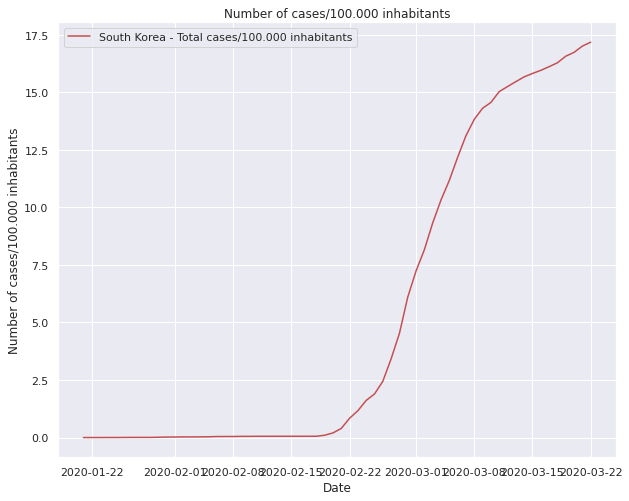

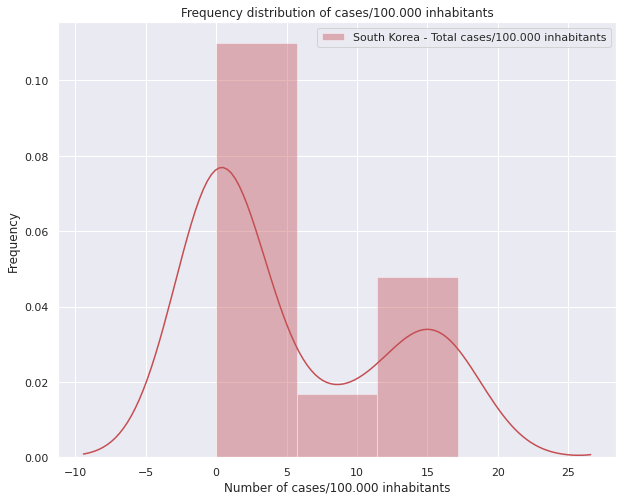

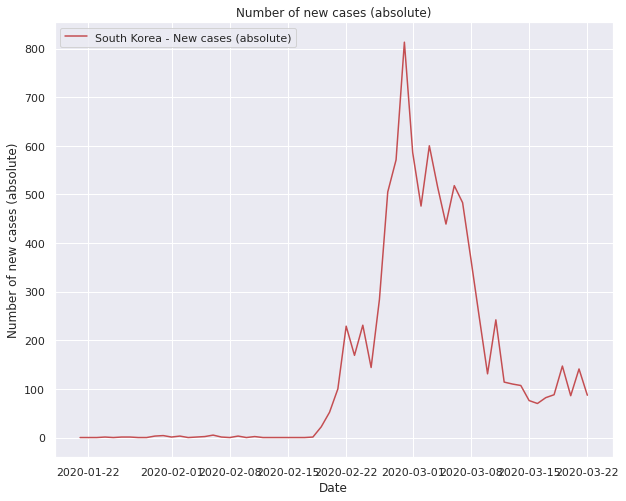

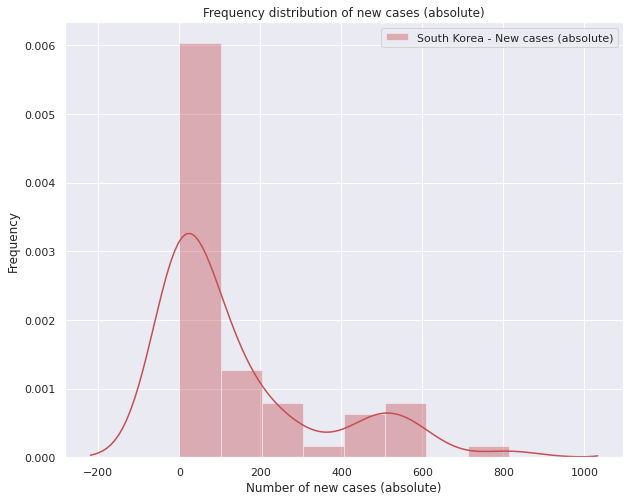

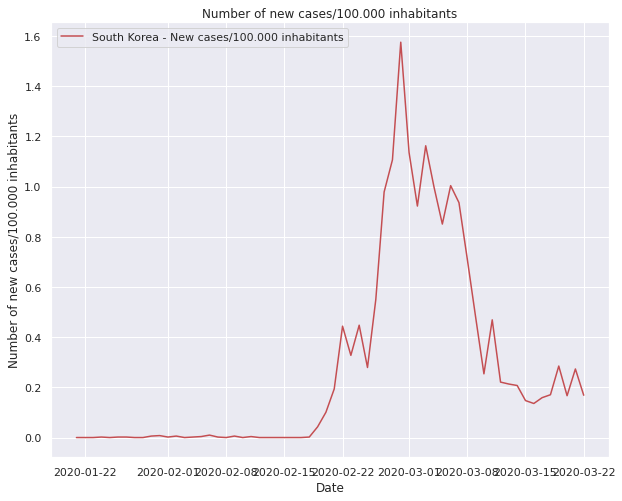

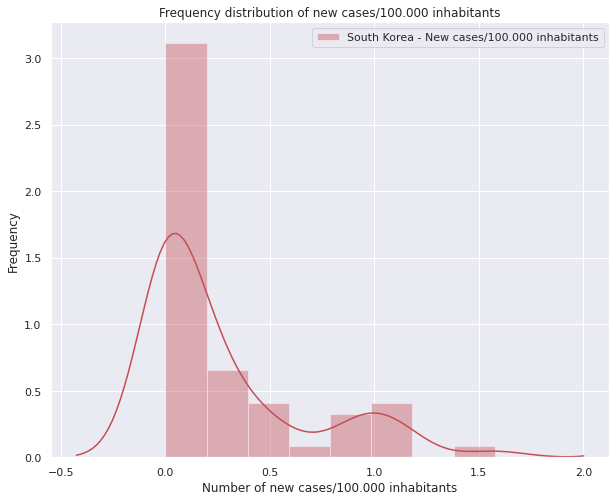

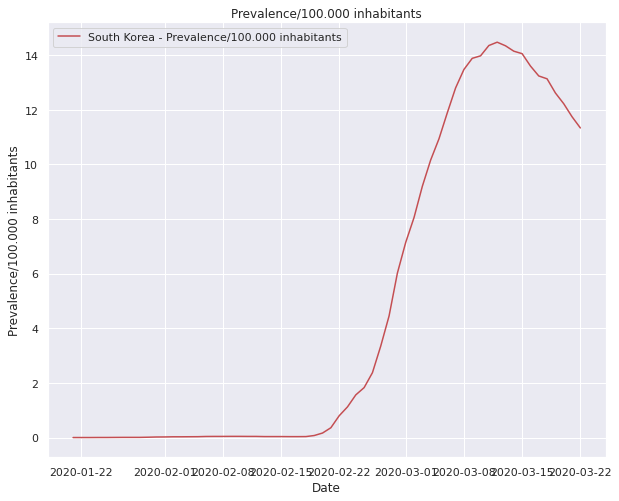

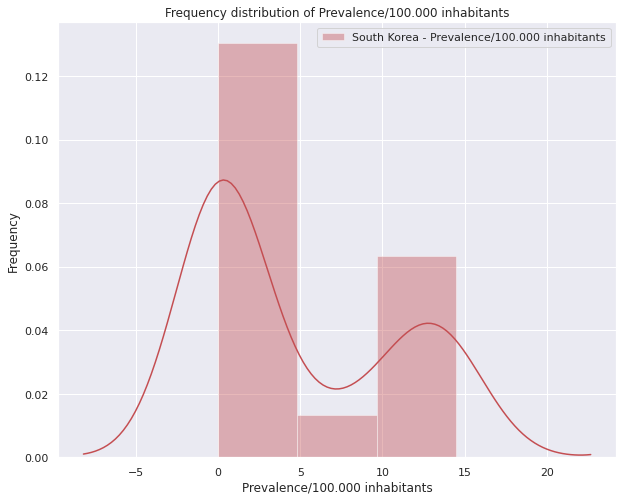

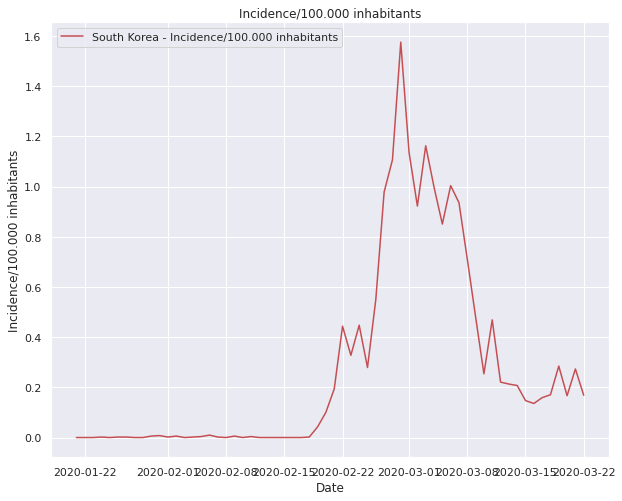

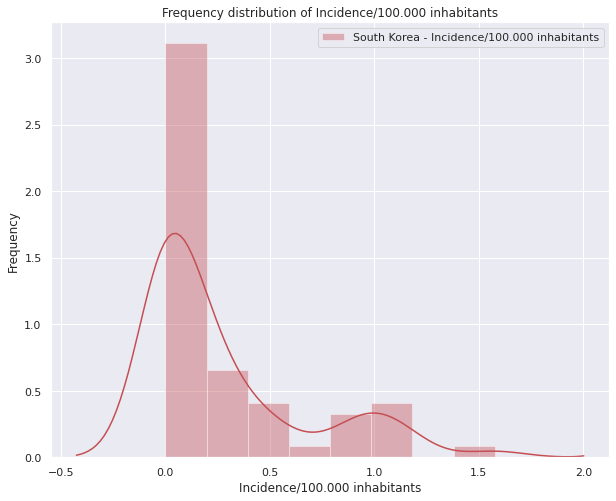

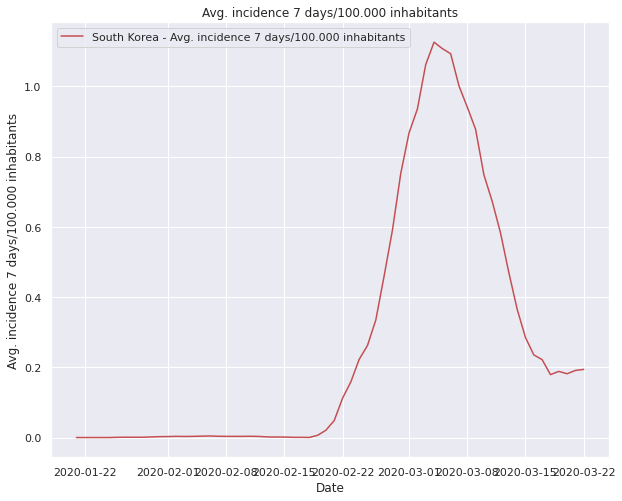

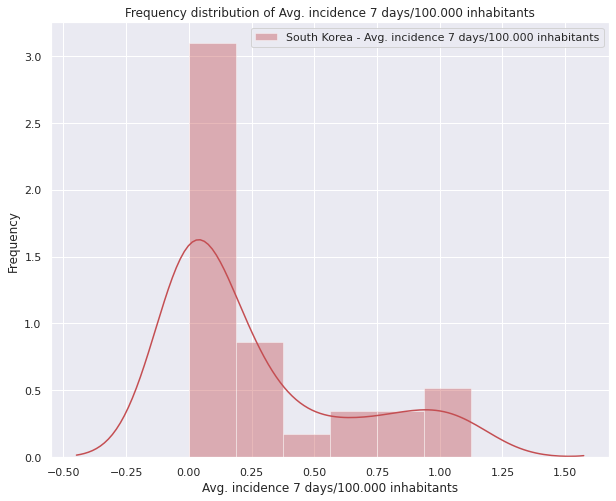

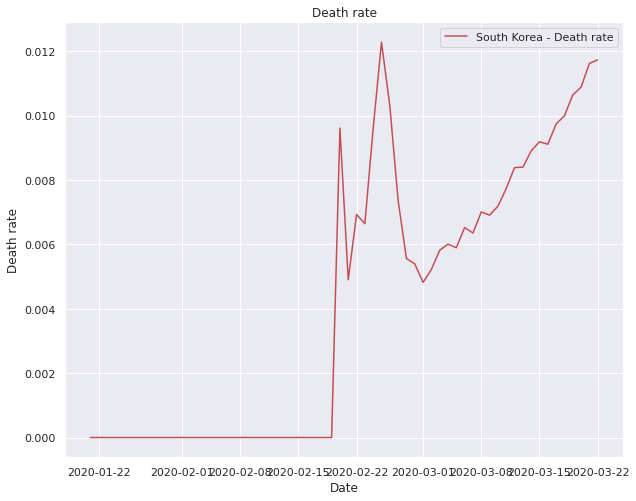

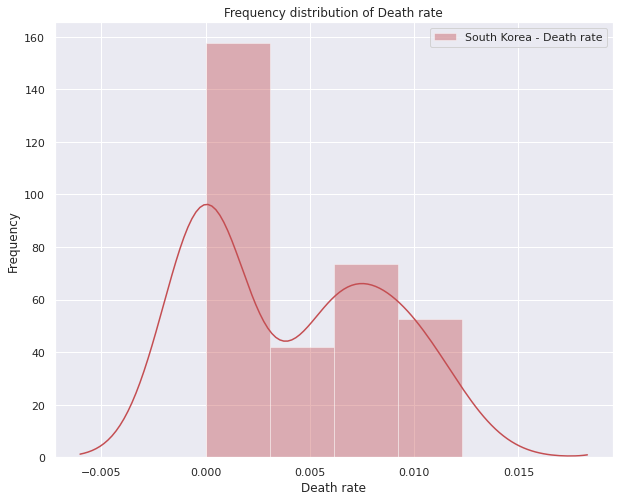

time: 4.65 s


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(korea["totalcases"] , color="r", label="South Korea - Total cases/100.000 inhabitants")
plt.ylabel("Number of cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["totalcases"] , color="r", label="South Korea - Total cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of cases/100.000 inhabitants")
plt.title('Frequency distribution of cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(korea["newcases"] , color="r", label="South Korea - New cases (absolute)")
plt.ylabel("Number of new cases (absolute)")
plt.xlabel("Date")
plt.title('Number of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["newcases"] , color="r", label="South Korea - New cases (absolute)")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases (absolute)")
plt.title('Frequency distribution of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(korea["newcases100k"] , color="r", label="South Korea - New cases/100.000 inhabitants")
plt.ylabel("Number of new cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["newcases100k"] , color="r", label="South Korea - New cases/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Number of new cases/100.000 inhabitants")
plt.title('Frequency distribution of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(korea["prevalence"] , color="r", label="South Korea - Prevalence/100.000 inhabitants")
plt.ylabel("Prevalence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["prevalence"] , color="r", label="South Korea - Prevalence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Prevalence/100.000 inhabitants")
plt.title('Frequency distribution of Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(korea["incidence"] , color="r", label="South Korea - Incidence/100.000 inhabitants")
plt.ylabel("Incidence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["incidence"] , color="r", label="South Korea - Incidence/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Incidence/100.000 inhabitants")
plt.title('Frequency distribution of Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(korea["incidence7d"] , color="r", label="South Korea - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("Avg. incidence 7 days/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["incidence7d"] , color="r", label="South Korea - Avg. incidence 7 days/100.000 inhabitants")
plt.ylabel("Frequency")
plt.xlabel("Avg. incidence 7 days/100.000 inhabitants")
plt.title('Frequency distribution of Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(korea["deathrate"] , color="r", label="South Korea - Death rate")
plt.ylabel("Death rate")
plt.xlabel("Date")
plt.title('Death rate')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(korea["deathrate"] , color="r", label="South Korea - Death rate")
plt.ylabel("Frequency")
plt.xlabel("Death rate")
plt.title('Frequency distribution of Death rate')
plt.legend()
plt.show()

###Joint analysis

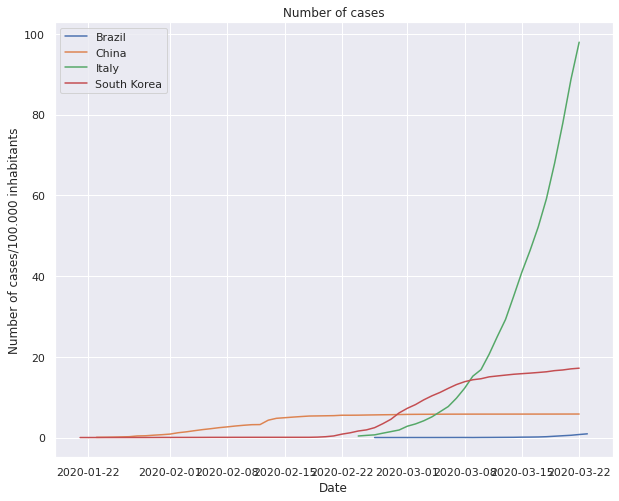

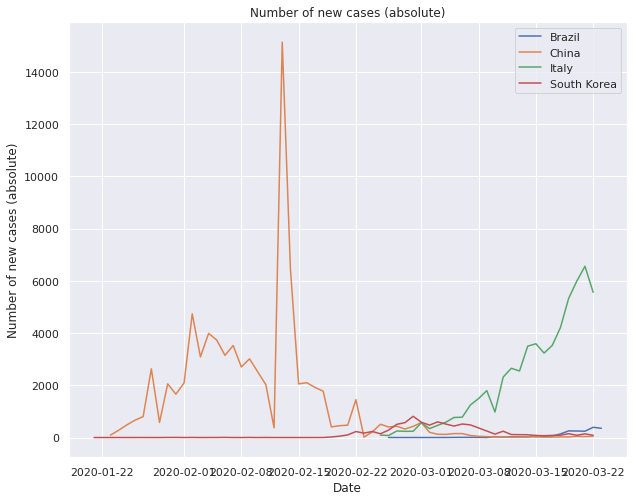

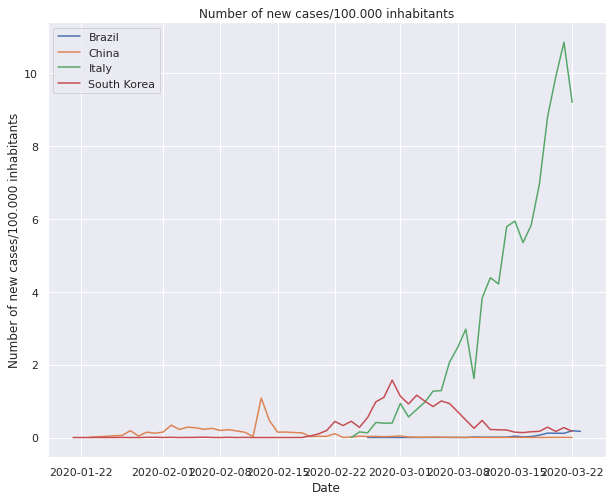

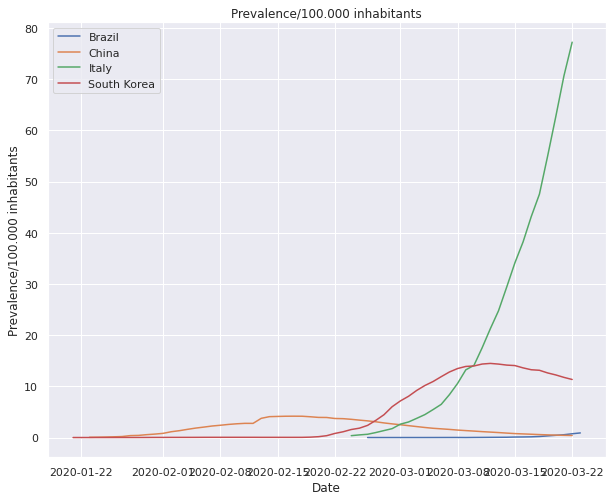

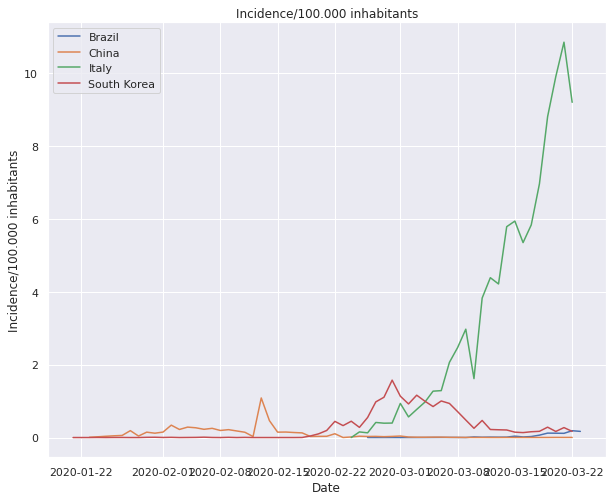

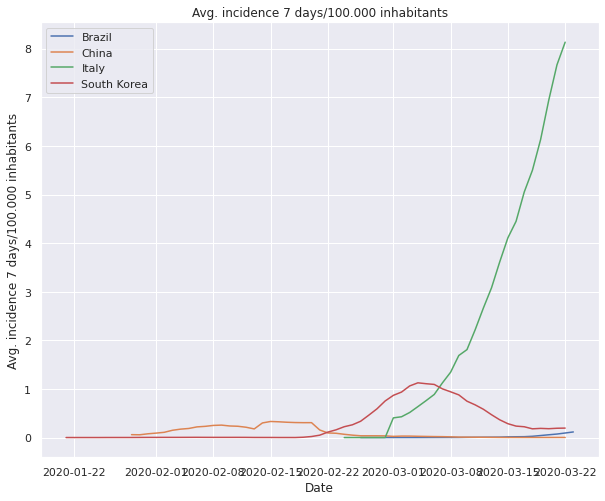

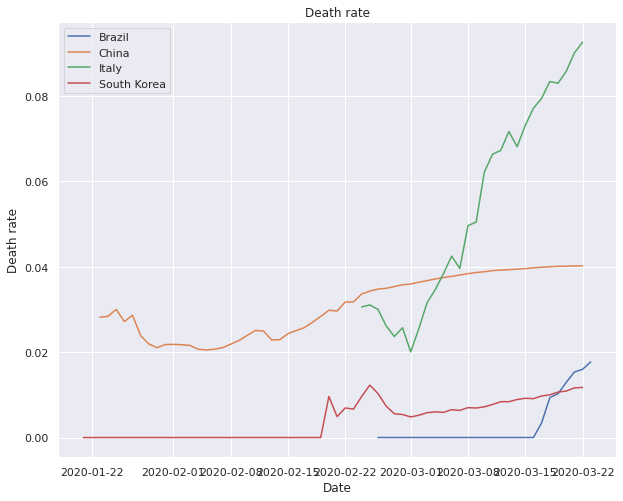

time: 2.39 s


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(brazil["totalcases"] , label="Brazil")
plt.plot(china["totalcases"] , label="China")
plt.plot(italy["totalcases"] , label="Italy")
plt.plot(korea["totalcases"] , label="South Korea")
plt.ylabel("Number of cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of cases')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["newcases"] , label="Brazil")
plt.plot(china["newcases"] , label="China")
plt.plot(italy["newcases"] , label="Italy")
plt.plot(korea["newcases"] , label="South Korea")
plt.ylabel("Number of new cases (absolute)")
plt.xlabel("Date")
plt.title('Number of new cases (absolute)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["newcases100k"] , label="Brazil")
plt.plot(china["newcases100k"] , label="China")
plt.plot(italy["newcases100k"] , label="Italy")
plt.plot(korea["newcases100k"] , label="South Korea")
plt.ylabel("Number of new cases/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Number of new cases/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["prevalence"] , label="Brazil")
plt.plot(china["prevalence"] , label="China")
plt.plot(italy["prevalence"] , label="Italy")
plt.plot(korea["prevalence"] , label="South Korea")
plt.ylabel("Prevalence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Prevalence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["incidence"] , label="Brazil")
plt.plot(china["incidence"] , label="China")
plt.plot(italy["incidence"] , label="Italy")
plt.plot(korea["incidence"] , label="South Korea")
plt.ylabel("Incidence/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Incidence/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["incidence7d"] , label="Brazil")
plt.plot(china["incidence7d"] , label="China")
plt.plot(italy["incidence7d"] , label="Italy")
plt.plot(korea["incidence7d"] , label="South Korea")
plt.ylabel("Avg. incidence 7 days/100.000 inhabitants")
plt.xlabel("Date")
plt.title('Avg. incidence 7 days/100.000 inhabitants')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(brazil["deathrate"] , label="Brazil")
plt.plot(china["deathrate"] , label="China")
plt.plot(italy["deathrate"] , label="Italy")
plt.plot(korea["deathrate"] , label="South Korea")
plt.ylabel("Death rate")
plt.xlabel("Date")
plt.title('Death rate')
plt.legend()
plt.show()

## Overview of the data.
Let's see overview of the data.
We can use seasonal_decompose method to separate into four graphs(Observed,Trend,Seasonal,Residual).
What is seasonal_decompose method parameter 'freq'?

freq = 365 : trend of year.
freq = 30 : trend of month.
freq = 7 : trend of week.
We choose 'freq=365' ,because this data is long term.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

time: 7.52 ms


# Model implementation

In [ ]:
from sklearn.model_selection import GridSearchCV

def finder(X_train, y_train, model, params, cross_v):

    finder = GridSearchCV(
            estimator=model,
            param_grid=params,
            scoring='neg_mean_absolute_error',
            # fit_params=None,
            n_jobs=None,
            iid=False,
            refit=False,
            cv=cross_v,  # change this to the splitter subject to test
            verbose=1,
            pre_dispatch=8,
            error_score=-999,
            return_train_score=True
        )

    finder.fit(X_train, y_train)

    
    return finder.best_params_, finder.cv_results_


time: 12.7 ms


In [ ]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

time: 11 ms


## Gradient Boosting Regressor

### Italy

In [ ]:
# metrics_df = pd.concat([pd.DataFrame(cv_results["params"]),pd.DataFrame(cv_results["mean_test_score"], columns=["mse"])],axis=1)

time: 981 µs


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mae', 'learning_rate': 0.02, 'max_depth': 2, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 10}
MAE 4101.956572102252
MSE 4101.956572102252
                      0
date                   
2020-03-19  1853.043428
2020-03-20  1853.043428
2020-03-21  1853.043428
date
2020-03-19    5322.0
2020-03-20    5986.0
2020-03-21    6557.0
Name: y, dtype: float64


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    5.7s finished


findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


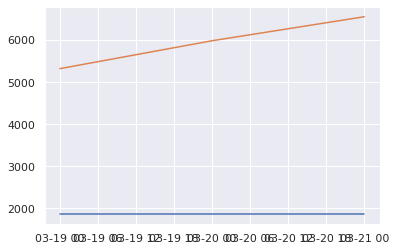

time: 6.1 s


In [ ]:
# variables = ['newcases', 'newcases100k', 'deathrate']
metrics = pd.DataFrame()

italy = italy.fillna(0)
italy = italy.drop('incidence7d', axis=1)

italy['newcases100k'] = italy['newcases100k'].shift(periods=-1)
italy['totalcases'] = italy['totalcases'].shift(periods=-1)
italy['prevalence'] = italy['prevalence'].shift(periods=-1)
italy['incidence'] = italy['incidence'].shift(periods=-1)
italy['deathrate'] = italy['deathrate'].shift(periods=-1)
italy = italy.dropna()

tra_cross, trv = train_test_split(pd.DataFrame(italy.dropna()), test_size=0.1, shuffle=False)


# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(tra_cross.copy())
data = data.rename(columns = {'newcases': 'y'})

data_val = pd.DataFrame(trv.copy())
data_val = data_val.rename(columns = {'newcases': 'y'})



# Adding the lag of the target variable from 6 steps back up to 24
for i in range(1, 2):
    data["lag_{}".format(i)] = data.y.shift(i).fillna(0)

for i in range(1, 2):
    data_val["lag_{}".format(i)] = data_val.y.shift(i).fillna(0)

tra_cross_x = data.drop('y', axis=1, )
tra_cross_y = data["y"]

trv_x = data_val.drop('y', axis=1, )
trv_y = data_val["y"]

param_grid = {
            'n_estimators':[10,20, 30], 
            'criterion': ['mae'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[2, 3, 5, 10], 
            'min_samples_leaf':[2, 4, 8], 
            'max_features':[1.0, 2.0]}

clf = GradientBoostingRegressor()
tscv = TimeSeriesSplit(n_splits=5)
bscv = BlockingTimeSeriesSplit(n_splits=5)

best_params, cv_results = finder(tra_cross_x, tra_cross_y, clf, param_grid, bscv)
print(best_params)
clf_train_italy = GradientBoostingRegressor(**best_params)

clf_train_italy.fit(tra_cross_x, tra_cross_y)
pred = pd.DataFrame(clf_train_italy.predict(trv_x))

pred['date'] = trv_y.index
pred = pred.set_index('date')

print('MAE', mean_absolute_error(trv_y, pred))
print('MSE', mean_absolute_error(trv_y, pred))

print(pred)
print(trv_y)

plt.plot(pred)
plt.plot(trv_y)


### China

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 20}
MAE 186.19305245415853
MSE 186.19305245415853
                     0
date                  
2020-03-16  206.815685
2020-03-17  206.815685
2020-03-18  206.815685
2020-03-19  230.103338
2020-03-20  203.568279
2020-03-21  229.039643
date
2020-03-16    19
2020-03-17    17
2020-03-18    22
2020-03-19    25
2020-03-20    46
2020-03-21    37
Name: y, dtype: int64


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    5.9s finished


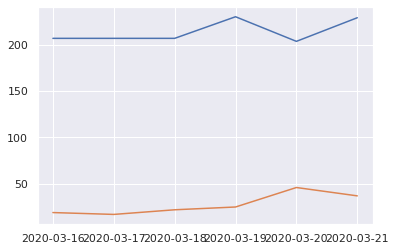

time: 6.2 s


In [ ]:
# variables = ['newcases', 'newcases100k', 'deathrate']
metrics = pd.DataFrame()

china = china.fillna(0)
china = china.drop('incidence7d', axis=1)

china['newcases100k'] = china['newcases100k'].shift(periods=-1)
china['totalcases'] = china['totalcases'].shift(periods=-1)
china['prevalence'] = china['prevalence'].shift(periods=-1)
china['incidence'] = china['incidence'].shift(periods=-1)
china['deathrate'] = china['deathrate'].shift(periods=-1)
china = china.dropna()

tra_cross, trv = train_test_split(pd.DataFrame(china.dropna()), test_size=0.1, shuffle=False)


# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(tra_cross.copy())
data = data.rename(columns = {'newcases': 'y'})

data_val = pd.DataFrame(trv.copy())
data_val = data_val.rename(columns = {'newcases': 'y'})



# Adding the lag of the target variable from 6 steps back up to 24
for i in range(1, 2):
    data["lag_{}".format(i)] = data.y.shift(i).fillna(0)

for i in range(1, 2):
    data_val["lag_{}".format(i)] = data_val.y.shift(i).fillna(0)

tra_cross_x = data.drop('y', axis=1, )
tra_cross_y = data["y"]

trv_x = data_val.drop('y', axis=1, )
trv_y = data_val["y"]


param_grid = {
            'n_estimators':[10,20, 30], 
            'criterion': ['mae'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[2, 3, 5, 10], 
            'min_samples_leaf':[2, 4, 8], 
            'max_features':[1.0, 2.0]}

clf = GradientBoostingRegressor()
tscv = TimeSeriesSplit(n_splits=5)
bscv = BlockingTimeSeriesSplit(n_splits=5)

best_params, cv_results = finder(tra_cross_x, tra_cross_y, clf, param_grid, bscv)
print(best_params)
clf_train_china = GradientBoostingRegressor(**best_params)

clf_train_china.fit(tra_cross_x, tra_cross_y)
pred = pd.DataFrame(clf_train_china.predict(trv_x))

pred['date'] = trv_y.index
pred = pred.set_index('date')

print('MAE', mean_absolute_error(trv_y, pred))
print('MSE', mean_absolute_error(trv_y, pred))

print(pred)
print(trv_y)

plt.plot(pred)
plt.plot(trv_y)


### Korea

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 30}
MAE 41.9811727561951
MSE 41.9811727561951
                     0
date                  
2020-03-15   94.254603
2020-03-16  105.992391
2020-03-17  105.992391
2020-03-18  170.340613
2020-03-19  119.526201
2020-03-20  170.340613
2020-03-21  119.526201
date
2020-03-15     76
2020-03-16     70
2020-03-17     82
2020-03-18     88
2020-03-19    147
2020-03-20     86
2020-03-21    141
Name: y, dtype: int64


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.9s finished


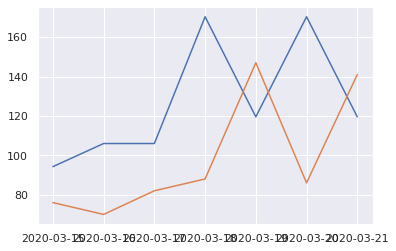

time: 3.38 s


In [ ]:
# variables = ['newcases', 'newcases100k', 'deathrate']
metrics = pd.DataFrame()

korea = korea.fillna(0)
korea = korea.drop('incidence7d', axis=1)

korea['newcases100k'] = korea['newcases100k'].shift(periods=-1)
korea['totalcases'] = korea['totalcases'].shift(periods=-1)
korea['prevalence'] = korea['prevalence'].shift(periods=-1)
korea['incidence'] = korea['incidence'].shift(periods=-1)
korea['deathrate'] = korea['deathrate'].shift(periods=-1)
korea = korea.dropna()

tra_cross, trv = train_test_split(pd.DataFrame(korea.dropna()), test_size=0.1, shuffle=False)


# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(tra_cross.copy())
data = data.rename(columns = {'newcases': 'y'})

data_val = pd.DataFrame(trv.copy())
data_val = data_val.rename(columns = {'newcases': 'y'})



# Adding the lag of the target variable from 6 steps back up to 24
for i in range(1, 2):
    data["lag_{}".format(i)] = data.y.shift(i).fillna(0)

for i in range(1, 2):
    data_val["lag_{}".format(i)] = data_val.y.shift(i).fillna(0)

tra_cross_x = data.drop('y', axis=1, )
tra_cross_y = data["y"]

trv_x = data_val.drop('y', axis=1, )
trv_y = data_val["y"]


param_grid = {
            'n_estimators':[10,20, 30], 
            'criterion': ['mae'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[5, 10], 
            'min_samples_leaf':[2, 4, 8], 
            'max_features':[1.0, 2.0]} 

clf = GradientBoostingRegressor()
tscv = TimeSeriesSplit(n_splits=5)
bscv = BlockingTimeSeriesSplit(n_splits=5)

best_params, cv_results = finder(tra_cross_x, tra_cross_y, clf, param_grid, bscv)
print(best_params)
clf_train_korea = GradientBoostingRegressor(**best_params)

clf_train_korea.fit(tra_cross_x, tra_cross_y)
pred = pd.DataFrame(clf_train_korea.predict(trv_x))

pred['date'] = trv_y.index
pred = pred.set_index('date')

print('MAE', mean_absolute_error(trv_y, pred))
print('MSE', mean_absolute_error(trv_y, pred))

print(pred)
print(trv_y)

plt.plot(pred)
plt.plot(trv_y)


### Brazil

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mae', 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 10}
MAE 197.48175208306535
MSE 197.48175208306535
                    0
date                 
2020-03-20  96.851581
2020-03-21  96.851581
2020-03-22  96.851581
date
2020-03-20    249
2020-03-21    242
2020-03-22    392
Name: y, dtype: int64


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.9s finished


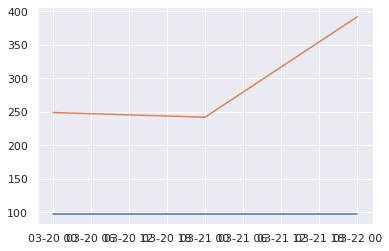

time: 3.24 s


In [ ]:
# variables = ['newcases', 'newcases100k', 'deathrate']
metrics = pd.DataFrame()

brazil = brazil.fillna(0)
brazil = brazil.drop('incidence7d', axis=1)

brazil['newcases100k'] = brazil['newcases100k'].shift(periods=-1)
brazil['totalcases'] = brazil['totalcases'].shift(periods=-1)
brazil['prevalence'] = brazil['prevalence'].shift(periods=-1)
brazil['incidence'] = brazil['incidence'].shift(periods=-1)
brazil['deathrate'] = brazil['deathrate'].shift(periods=-1)
brazil = brazil.dropna()

tra_cross, trv = train_test_split(pd.DataFrame(brazil.dropna()), test_size=0.1, shuffle=False)


# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(tra_cross.copy())
data = data.rename(columns = {'newcases': 'y'})

data_val = pd.DataFrame(trv.copy())
data_val = data_val.rename(columns = {'newcases': 'y'})



# Adding the lag of the target variable from 6 steps back up to 24
for i in range(1, 2):
    data["lag_{}".format(i)] = data.y.shift(i).fillna(0)

for i in range(1, 2):
    data_val["lag_{}".format(i)] = data_val.y.shift(i).fillna(0)

tra_cross_x = data.drop('y', axis=1, )
tra_cross_y = data["y"]

trv_x = data_val.drop('y', axis=1, )
trv_y = data_val["y"]

param_grid = {
            'n_estimators':[10,20, 30], 
            'criterion': ['mae'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[5, 10], 
            'min_samples_leaf':[2, 4, 8], 
            'max_features':[1.0, 2.0]}

clf = GradientBoostingRegressor()
tscv = TimeSeriesSplit(n_splits=5)
bscv = BlockingTimeSeriesSplit(n_splits=5)

best_params, cv_results = finder(tra_cross_x, tra_cross_y, clf, param_grid, bscv)
print(best_params)
clf_train = GradientBoostingRegressor(**best_params)

clf_train.fit(tra_cross_x, tra_cross_y)
pred = pd.DataFrame(clf_train.predict(trv_x))

pred['date'] = trv_y.index
pred = pred.set_index('date')

print('MAE', mean_absolute_error(trv_y, pred))
print('MSE', mean_absolute_error(trv_y, pred))

print(pred)
print(trv_y)

plt.plot(pred)
plt.plot(trv_y)
